In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j

custom jupyter library imported


In [219]:
# def thresh(a, key, split):
#     a = np.array(a[key])
#     r = a == a
#     if key == 'Signal power':
#         return a > -1300
#     if key == 'SNR':
#         r = a > -200
#     if key == 'txTime':
#         r = a < 10000
#     if key == 'energy':
#         r = a < 100000
#     if key == 'TX power':
#         r = a > -1000
#     if key == 'EARFCN':
#         r = a < 10000
#     if key == 'PCI':
#         r = a < 1000
#     if key == 'RSRQ':
#         r = a > -1000
#     return np.invert(r) if split else r
    
def compare(text, ylabel, xlabel, ky, kx, ry, rx, descr='all_nw', overlay='all', split=False, hist=False):
    _debug = False
    nplots = 2 if 'all' in descr else 1
    fx = 14 if nplots > 1 else 7
    fy = 8 if split else 4
    sx = 2 if split else 1
    sy = 2 if nplots > 1 else 1
    j.debug = False
    alpha = [1, 0.7]
    if _debug: 
        print(fx, fy, sx, sy,)    
    
    plt.figure(figsize=(fx, fy))
    plt.suptitle(text) 
    
    splitlen = 2 if split else 1
    for i in range(splitlen):
        if i > 0:
            split = False
        if descr in ['zte', 'all_nw']:
            plt.subplot(sx, sy, 1 + i * 2)
            plt.xlabel('MTN ZTE ' + xlabel)
            plt.ylabel(ylabel)
            if overlay in ['ublox', 'all']:
                j.dirr = 'logs/zte_mtn/rf_shield/ublox/'
                plot(kx, ky, rx, ry, files, 'g*', alpha[0], split, hist)
            if overlay in ['quectel', 'all']:
                j.dirr = 'logs/zte_mtn/rf_shield/quectel/'
                plot(kx, ky, rx, ry, files, 'k*', alpha[1], split, hist)
        if descr in ['nokia', 'all_nw'] and nplots > 1:
            plt.subplot(sx, sy, 2 + i * 2)
            plt.xlabel('Vodacom Nokia ' + xlabel)
            if overlay in ['ublox', 'all']:
                j.dirr = 'logs/nokia_vodacom/centurycity/ublox/'
                plot(kx, ky, rx, ry, files, 'b*', alpha[0], split, hist)
            if overlay in ['quectel', 'all']:
                j.dirr = 'logs/nokia_vodacom/centurycity/quectel/'
                plot(kx, ky, rx, ry, files, 'r*', alpha[1], split, hist)
        if descr in ['ublox', 'all_ue']:
            plt.subplot(sx, sy, 1 + i * 2)
            plt.xlabel('Ublox ' + xlabel)
            plt.ylabel(ylabel)
            if overlay in ['zte', 'all']:
                j.dirr = 'logs/zte_mtn/rf_shield/ublox/'
                plot(kx, ky, rx, ry, files, 'g*', alpha[0], split, hist)
            if overlay in ['nokia', 'all']:
                j.dirr = 'logs/nokia_vodacom/centurycity/ublox/'
                plot(kx, ky, rx, ry, files, 'b*', alpha[1], split, hist)
        if descr in ['quectel', 'all_ue']:
            plt.subplot(sx, sy, 2 + i * 2)
            plt.xlabel('Quectel ' + xlabel)
            if overlay in ['zte', 'all']:
                j.dirr = 'logs/zte_mtn/rf_shield/quectel/'
                plot(kx, ky, rx, ry, files, 'k*', alpha[0], split, hist)
            if overlay in ['nokia', 'all']:
                j.dirr = 'logs/nokia_vodacom/centurycity/quectel/'
                plot(kx, ky, rx, ry, files, 'r*', alpha[1], split, hist)
        
    plt.savefig('img/vodacom_vs_mtn_' + descr + "_" + "_".join(text.split()) + '.png')
    plt.show()
    
def dict_filt(dc, x, y, split):
    _debug = False
    try:
        t = thresh(dc[x], x, split)
        p = np.array(dc[x])[t]
        q = np.array(dc[y])[t]
        t2 = thresh(q, y, split)
        if _debug:
            print('dc[x]', x, len(dc[x]), 'dc[y]', y, len(dc[y]), dc[x], dc[y])
            print('p', len(p), 'q', len(q), 't', p, q, t,)
            print('p[t2]', len(p[t2]), 'q[t2]', len(q[t2]), p[t2], q[t2], 't2', t2, end="\n")
        return p[t2], q[t2]
    except IndexError:
        if len(p) and len(q):
            print(IndexError, 'len(p) and len(q)', len(p) and len(q))
            return p, q
        else:
            print(IndexError, 'len(dc[x]) and len(dc[y])', len(dc[x]) and len(dc[y]))
            return np.array(dc[x]), np.array(dc[y])

def plot(x, y, xr, yr, files, colour, alpha, split, hist):
    hy = []
    for f in files:
        zu_mg = j.merge(j.mk(f))
        if zu_mg:
            p, q = dict_filt(zu_mg, x, y, split)
            if len(p) and len(q):
                if hist:
                    # print('hist q/yr', q/yr)
                    if len(q):
                        hy.append(q/yr)
                    continue
                # print('plot q/yr', q/yr)
                plt.plot(p/xr, q/yr, colour, alpha=alpha)
    if hist and hy:
        # remember that ravel passes by reference. unlike flatten which passes a copy of the array
        hy = np.concatenate(np.ravel(hy))
        # print(hy)
        plt.hist(hy, color=colour[0], alpha=alpha)

In [220]:
files = []
files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

['release/release1/*', 'release/release16/*', 'release/release64/*', 'release/release128/*', 'release/release256/*', 'release/release512/*', 'release/release0/*', 'echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*', 'cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*', 'drx/cap/*', 'ptau/capture/*']


In [221]:
a = np.array([True,True,False])
b = np.array([False,True,True])
a * b

array([False,  True, False])

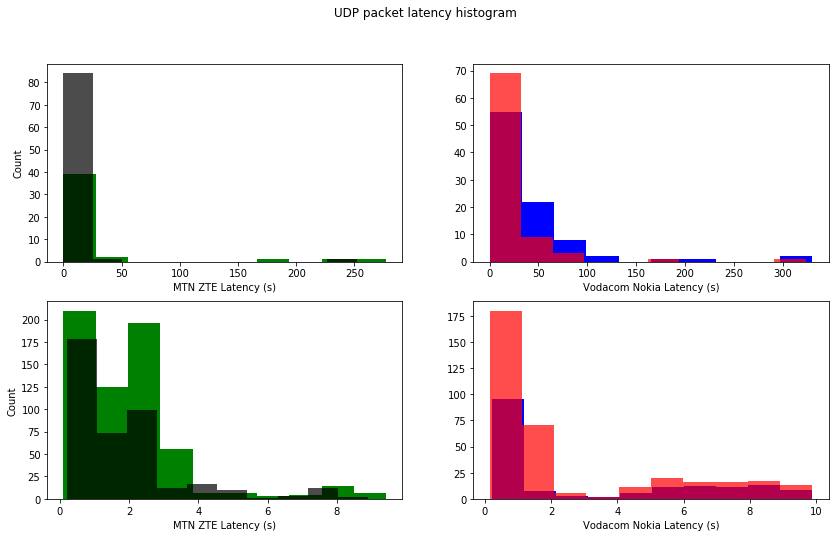

In [222]:
def thresh(a, key, split):
    a = np.array(a[:])
    r = a == a
    if key == 'txTime':
        r = (a < 10000) * (a > 100)
    elif key == 'Signal power':
        return a > -1450
    else:
        return r
    return np.invert(r) if split else r
compare('UDP packet latency histogram', 'Count', 'Latency (s)', 'txTime', 'Signal power', 1000, 10, 'all_nw', 'all', True, True)

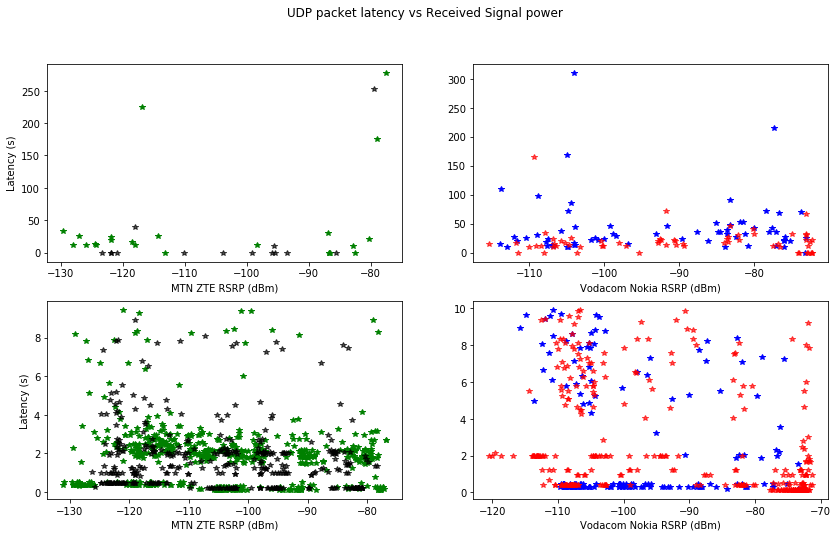

In [224]:
def thresh(a, key, split):
    a = np.array(a)
    r = a == a
    if key == 'txTime':
        r = (a < 10000) * (a > 100)
    elif key == 'Signal power':
        return a > -1350
    else:
        return r
    return np.invert(r) if split else r
compare('UDP packet latency vs Received Signal power', 'Latency (s)', 'RSRP (dBm)', 'txTime', 'Signal power', 1000, 10, 'all_nw', 'all', True)